# Milestone 1 Phase 2

Annesa Fadhila Damayanti

Batch 11

## Problems

memprediksi churn. memprediksi apakah customer tersebut akan stay atau bertahan menggunakan Telco atau berhenti menggunakan Telco

***Reference***

from some code refernce in dataset kaggle Telco Customer Churn ANN

# Import Library

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Data Loading

In [2]:
data = pd.read_csv(r'C:\Users\annes\OneDrive\Documents\Hacktive8\assigments\Milestone\p2---ftds011---m1-nesafadhila\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df = data.copy()

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.sample(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4535,9647-ERGBE,Female,0,Yes,Yes,30,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.05,3046.15,Yes
811,4853-RULSV,Male,0,No,No,70,Yes,Yes,Fiber optic,Yes,No,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),104.00,7250.15,Yes
5753,7636-XUHWW,Male,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),19.90,33.7,No
6273,4342-HENTK,Female,1,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.65,142.35,Yes
5071,1746-TGTWV,Male,0,Yes,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Credit card (automatic),75.35,75.35,No
3635,5296-PSYVW,Female,0,Yes,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,24.55,1750.7,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


there is no missing value in this data

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.drop('customerID', inplace=True, axis=1)

drop customerID, karena menurut saya customerID tidak terlalu digunakan untuk memprediksi sebuah prediksi

In [10]:
df.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2448,Female,1,No,No,14,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.85,1531.4,Yes
5913,Female,0,No,No,26,Yes,No,Fiber optic,Yes,No,Yes,Yes,No,No,One year,Yes,Credit card (automatic),87.15,2274.1,No
2298,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Two year,Yes,Credit card (automatic),79.20,5420.65,No
76,Female,0,No,No,46,Yes,No,DSL,No,No,No,No,No,Yes,One year,No,Credit card (automatic),55.65,2688.85,No


# EDA

<AxesSubplot:xlabel='InternetService', ylabel='count'>

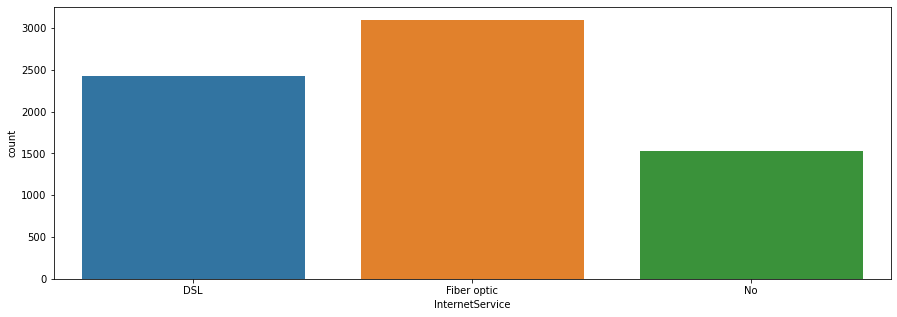

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='InternetService')

<AxesSubplot:xlabel='Contract', ylabel='count'>

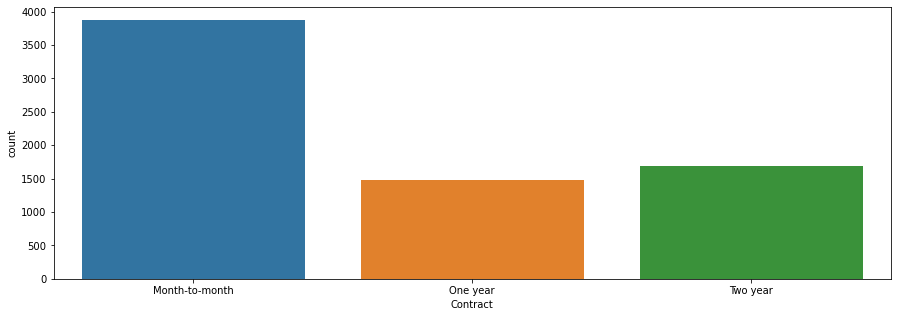

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Contract')

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

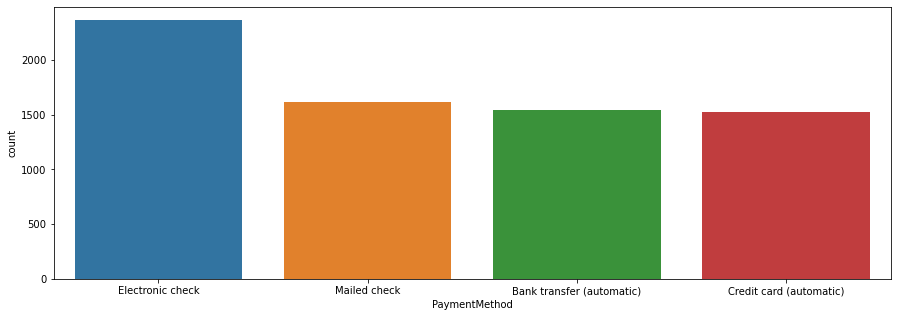

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='PaymentMethod')

<AxesSubplot:xlabel='Churn', ylabel='count'>

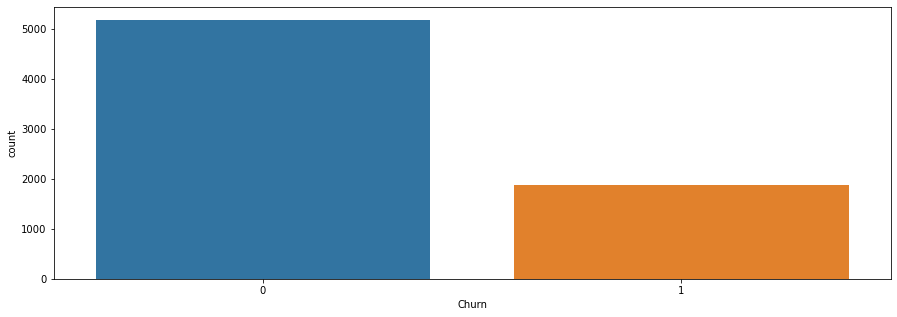

In [167]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Churn')

berdasarkan hasil plot tersebut, terlihat bahwa banyak nya Churn daripada tidak. yang artinya, banyak customer Telco yang memutuskan untuk berhenti menggunakan Telco.

In [14]:
# Melihat isi pada df
for i in df.columns:
    print(str(i)+ ': '+ str(df[i].unique()))

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [15]:
# Mengganti No Internet Service and No Phone Service to "NO"
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [16]:
# Mengubah Yes dan No menjadi Numbers
df.replace({'Yes' : 1, 'No' : 0}, inplace=True)

In [17]:
# New DataFrame
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [18]:
# Merubah Tipe Data di 'Total Charges' dari object menjadi numberic
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

<AxesSubplot:>

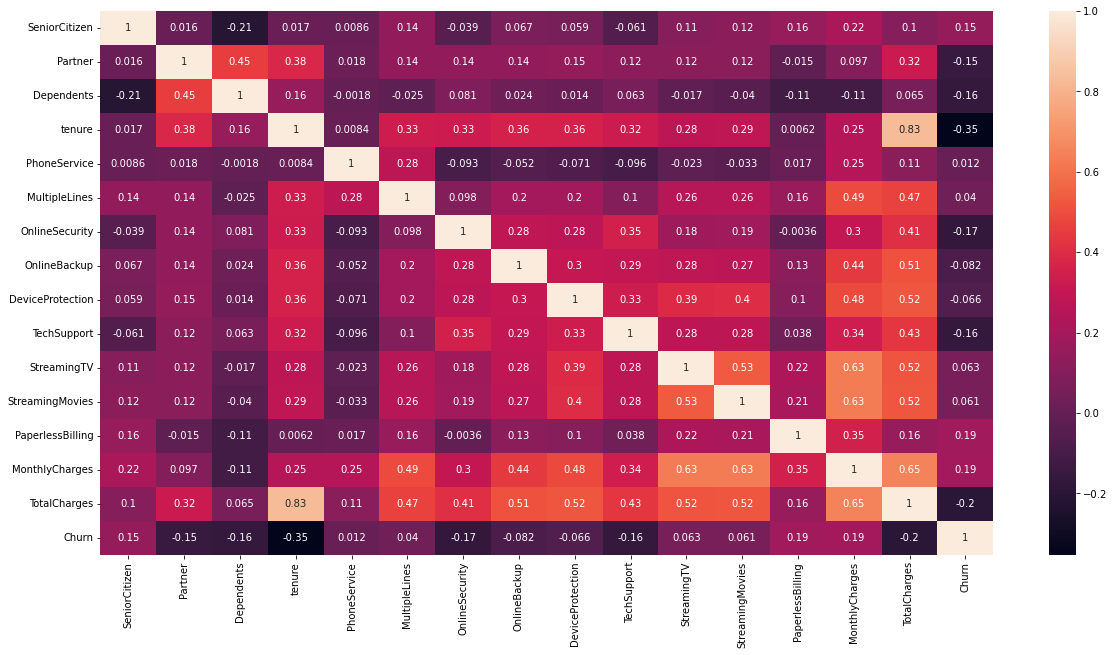

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

berdasarkan hasil heatmap diatas, yang memiliki korelasi yang sangat tinggi ada pada tenure dan total charges

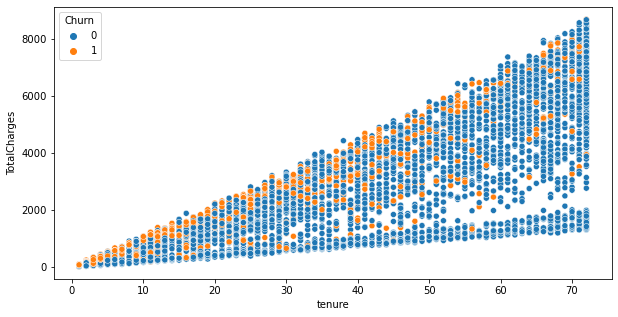

In [162]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='Churn')
plt.show()

karena menurtu heatmap tenure dan total charges memiliki korelasi yang tinggi. saya ingin mengetahui seberapa churn yang didapat dengan melihat 2 variable tersebut. berdasrkan hasil scatterplot, banyak customer yang memilih untuk tidak lanjut berlangganan Telco. 

<AxesSubplot:>

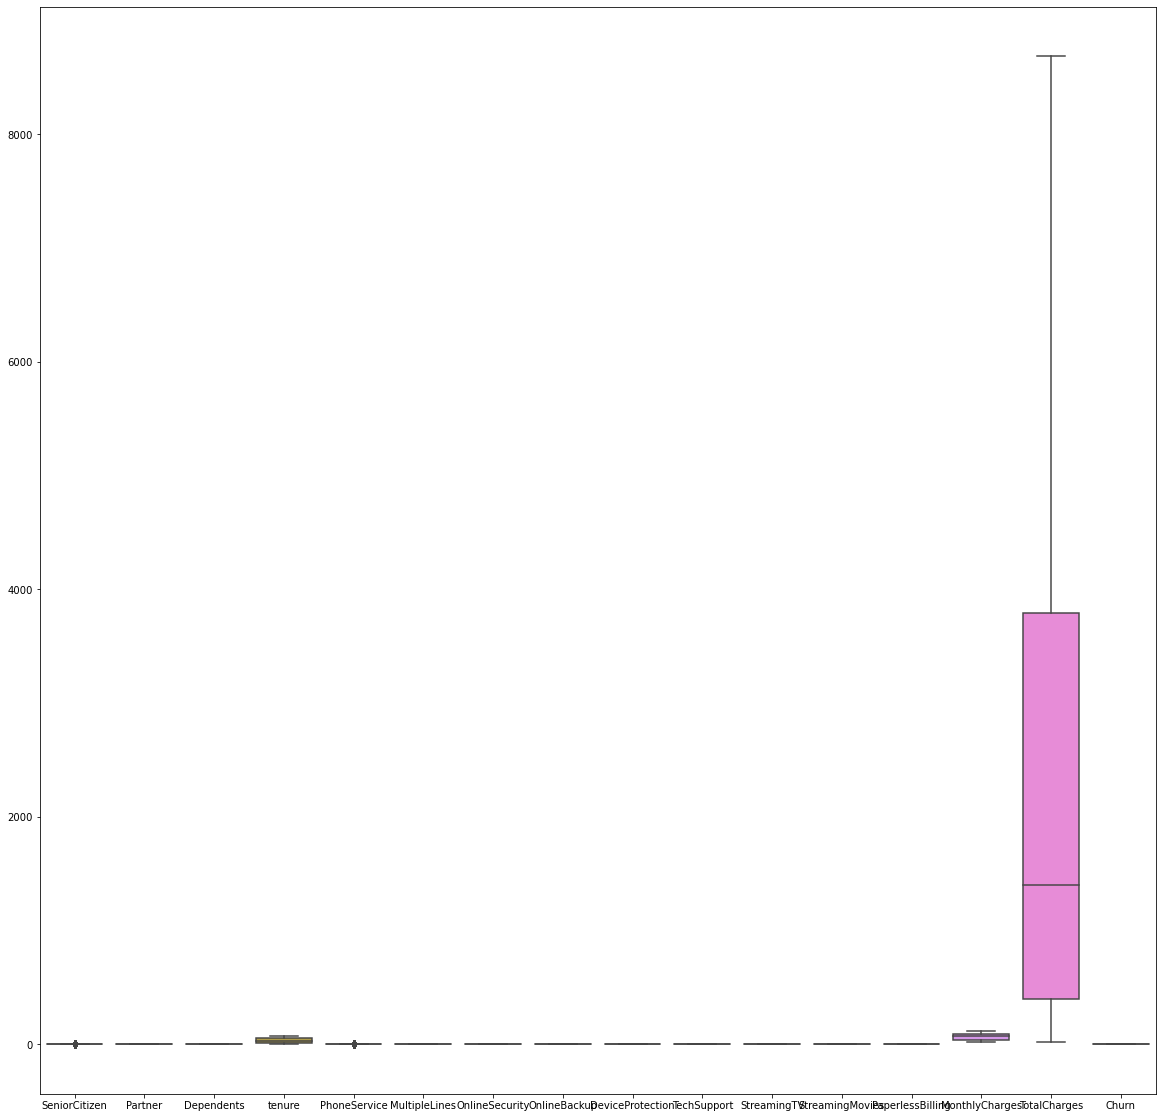

In [169]:
# Melihat ada outliers atau tidak
plt.figure(figsize=(20,20))
sns.boxplot(data=df)

tidak ada data outliers

# Data Preprocessing

In [21]:
# Category Columns One Hot
df_encoded = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])
df_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,0,0,0,1,0
1,Male,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,0,0,1,0,0,0,0,1
2,Male,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1,0,1,0,0,0,0,0,1
3,Male,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,0,1,0,1,0,0,0
4,Female,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,0,1,0,0,1,0,0,0,0,1
7039,Female,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,0,0,1,0,1,0,0,1,0,0
7040,Female,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,0
7041,Male,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,0,0,1,1,0,0,0,0,0,1


In [22]:
# Scaling the Data
scaler = MinMaxScaler()
cols_scaled = ['tenure','MonthlyCharges','TotalCharges']

df_encoded[cols_scaled] = scaler.fit_transform(df_encoded[cols_scaled])

In [23]:
# get data inference
df_inf = df_encoded.sample(20, random_state=400)
# Reset The Index
df_real = df_encoded.drop(df_inf.index)
df_real.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

In [107]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7023 entries, 0 to 7022
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7023 non-null   object 
 1   SeniorCitizen                            7023 non-null   int64  
 2   Partner                                  7023 non-null   int64  
 3   Dependents                               7023 non-null   int64  
 4   tenure                                   7023 non-null   float64
 5   PhoneService                             7023 non-null   int64  
 6   MultipleLines                            7023 non-null   int64  
 7   OnlineSecurity                           7023 non-null   int64  
 8   OnlineBackup                             7023 non-null   int64  
 9   DeviceProtection                         7023 non-null   int64  
 10  TechSupport                              7023 no

there is missing values in Total Charges

In [109]:
# Handling Missing Value in Total Charges with Median
df_update = df_real.fillna(df_real['TotalCharges'].median())
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7023 entries, 0 to 7022
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7023 non-null   object 
 1   SeniorCitizen                            7023 non-null   int64  
 2   Partner                                  7023 non-null   int64  
 3   Dependents                               7023 non-null   int64  
 4   tenure                                   7023 non-null   float64
 5   PhoneService                             7023 non-null   int64  
 6   MultipleLines                            7023 non-null   int64  
 7   OnlineSecurity                           7023 non-null   int64  
 8   OnlineBackup                             7023 non-null   int64  
 9   DeviceProtection                         7023 non-null   int64  
 10  TechSupport                              7023 no

In [110]:
# Split The Data X and y
X = df_update.drop(['gender','Churn'], axis=1)
y = df_update['Churn']

In [111]:
# Memisahkan Data menjadi Train, Test, Val
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X_train_full,y_train_full, test_size=0.8, random_state=10)

In [112]:
print('Size X_train : ', X_train.shape)
print('Size X_test : ', X_test.shape)
print('Size X_val : ', X_val.shape)
print('Size y_train : ', y_train.shape)
print('Size y_test : ', y_test.shape)
print('Size y_val : ', y_val.shape)

Size X_train :  (1123, 25)
Size X_test :  (1405, 25)
Size X_val :  (4495, 25)
Size y_train :  (1123,)
Size y_test :  (1405,)
Size y_val :  (4495,)


**karena data sudah balance tidak usah dilakukannya SMOTE atau menyeimbangkan data**

**Data sudah di encode dan scaled**

***dan juga data sudah di handling missing value dan tidak perlu handling outlliers karena datanya tidak mengandung outlierrs***

# Model Definition

In [113]:
# Membuat Pipeline Tensorflow

# Train
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(200)

# Test
test_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(200)

# Val
val_dataset = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(200)

# Model Training

## Sequential API

In [114]:
# Sequential API
model_sqt = Sequential()

model_sqt.add(Dense(20, activation='relu', input_shape=(25,)))
model_sqt.add(Dense(15))
model_sqt.add(Dense(1, activation='sigmoid'))

# Compile
model_sqt.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics='accuracy')

# Train
history_train_sqt = model_sqt.fit(train_dataset, epochs=100, validation_data=(val_dataset))

Epoch 1/100
6/6 [==============================] - 0s 24ms/step - loss: 0.6291 - accuracy: 0.7418 - val_loss: 0.6087 - val_accuracy: 0.7362
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6037 - accuracy: 0.7427 - val_loss: 0.5881 - val_accuracy: 0.7368
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.5826 - accuracy: 0.7444 - val_loss: 0.5704 - val_accuracy: 0.7368
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 0.5643 - accuracy: 0.7444 - val_loss: 0.5547 - val_accuracy: 0.7368
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.5477 - accuracy: 0.7444 - val_loss: 0.5405 - val_accuracy: 0.7368
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.5324 - accuracy: 0.7444 - val_loss: 0.5276 - val_accuracy: 0.7368
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 0.5181 - accuracy: 0.7444 - val_loss: 0.5155 - val_accuracy: 0.7368
Epoch 8/100
6/6 [====

In [115]:
model_sqt.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 20)                520       
                                                                 
 dense_70 (Dense)            (None, 15)                315       
                                                                 
 dense_71 (Dense)            (None, 1)                 16        
                                                                 
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


In [116]:
# Membuat DataFrame sequential metrics
sequential_metric = pd.DataFrame(history_train_sqt.history)

<AxesSubplot:>

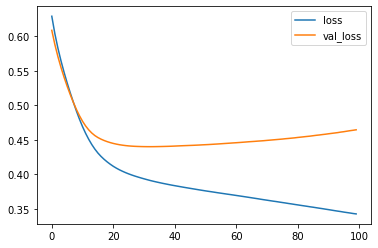

In [117]:
# Memplotkan. apakah hasilnya JustFit, UnderFit, atau OverFit
sequential_metric[['loss','val_loss']].plot()

berdasarkan hasil plot tersebut kita bisa liat kalau data tersebut overfit. sekitar epoch 15 data masih dikatakan fit tetapi setelah epoch berikutnya terlihat bahwa train tersebut sudah menjadi overfit.  maka dari itu kita perlu lakukan improvement model agar menjadikan model ini memprediksi dengan baik.

## Functional API

In [118]:
# Functional API
data_in = Input(shape=(25,))
hidden_1 = Dense(20, activation='relu')(data_in)
hidden_2 = Dense(15)(hidden_1)
data_out = Dense(1, activation= 'sigmoid')(hidden_2)

model_fun = Model(inputs=data_in, outputs=data_out)

# Compile
model_fun.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics='accuracy')

# Train
history_train_fun = model_fun.fit(train_dataset, epochs=100, validation_data=(val_dataset))

Epoch 1/100
6/6 [==============================] - 0s 27ms/step - loss: 0.6352 - accuracy: 0.6652 - val_loss: 0.6177 - val_accuracy: 0.6968
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 0.5966 - accuracy: 0.7266 - val_loss: 0.5900 - val_accuracy: 0.7286
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.5721 - accuracy: 0.7373 - val_loss: 0.5715 - val_accuracy: 0.7344
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 0.5545 - accuracy: 0.7427 - val_loss: 0.5571 - val_accuracy: 0.7362
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 0.5396 - accuracy: 0.7471 - val_loss: 0.5443 - val_accuracy: 0.7370
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 0.5259 - accuracy: 0.7507 - val_loss: 0.5325 - val_accuracy: 0.7366
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 0.5133 - accuracy: 0.7542 - val_loss: 0.5219 - val_accuracy: 0.7379
Epoch 8/100
6/6 [===

In [119]:
model_fun.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense_72 (Dense)            (None, 20)                520       
                                                                 
 dense_73 (Dense)            (None, 15)                315       
                                                                 
 dense_74 (Dense)            (None, 1)                 16        
                                                                 
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


In [120]:
# Membuat DataFrame functional metrics
functional_metric = pd.DataFrame(history_train_fun.history)

<AxesSubplot:>

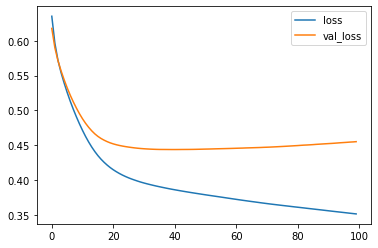

In [121]:
# Memplotkan. apakah hasilnya JustFit, UnderFit, atau OverFit
functional_metric[['loss','val_loss']].plot()

hasil plotnya hampir sama seperti sequential API yang datanya over fit dan di epoch sekitar 10 masih di katakan fit tetapi pada epoch selanjutnya dapat dikatakan overfit tetapi tidak separah jika menggunakan sequential API yang prediksinya hampir mendekati 0.50. maka dari itu kita perlu lakukan improvement model agar menjadikan model ini memprediksi dengan baik.

# Model Evaluation

In [155]:
# Sequential Evaluation
y_pred_sqt = model_sqt.predict(X_test)

# Threshold
y_pred_sqt = np.where(y_pred_sqt >= 0.5, 1, 0)

print('Sequential API Classification Report')
print(classification_report(y_pred_sqt,y_test))

print('----------------------------------------------------------------------------')

# Functional Evaluation
y_pred_fun = model_fun.predict(X_test)

# Threshold
y_pred_fun = np.where(y_pred_fun >= 0.5, 1, 0)

print('Functional API Classification Report')
print(classification_report(y_test,y_pred_fun))


44/44 [==============================] - 0s 2ms/step
Sequential API Classification Report
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1066
           1       0.59      0.68      0.63       339

    accuracy                           0.81      1405
   macro avg       0.74      0.77      0.75      1405
weighted avg       0.82      0.81      0.81      1405

----------------------------------------------------------------------------
44/44 [==============================] - 0s 879us/step
Functional API Classification Report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1009
           1       0.68      0.56      0.61       396

    accuracy                           0.80      1405
   macro avg       0.76      0.73      0.74      1405
weighted avg       0.79      0.80      0.79      1405



berdasarkan hasil classification report dari kedua model yang belum di improve, menghasilkan;
- sequential model, mendapatkan nilai precision sebesar 89%. yang artinya ada 89% dari data yang di klasifikasikan positif tidak churn dan dibandingkan dengan nilai recall sebesar 85%.
- sedangkan funcitonal model, mendapatkan nilai precision sebesar 84% yang artinya ada 84% dari data yang di klasifikasikan positif tidak churn dan dibandingkan dengan nilai recall 90%.
    - menurut saya, dalam hal churn ini lebih baik memprediksi menggunakan sequential model karena sequential model memilliki nilai precision lebih besar daripada functional model. dalam hal ini, lebih baik jika memiliki nilai precision yang tinggi. jika memiiki nilai percision yang tinggi artinya dapat meminimalisirkan false positif yang artinya kita dapat memprediksi dengan benar apakah customer tersebut akan churn atau tidak.

## Improve the Data

In [131]:
# Sequential API Improvement
model_sqt_imp = Sequential()

model_sqt_imp.add(Dense(20, activation='relu', input_shape=(25,), kernel_regularizer= tf.keras.regularizers.L2()))
model_sqt_imp.add(Dense(15, activation='relu'))
model_sqt_imp.add(Dense(1, activation='sigmoid'))

# Compile
model_sqt_imp.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics='accuracy')

# Train
history_train_sqt_imp = model_sqt_imp.fit(train_dataset, epochs=100, validation_data=(val_dataset))

Epoch 1/100
6/6 [==============================] - 1s 24ms/step - loss: 0.8752 - accuracy: 0.6492 - val_loss: 0.8564 - val_accuracy: 0.6727
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.8417 - accuracy: 0.7079 - val_loss: 0.8273 - val_accuracy: 0.7166
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.8144 - accuracy: 0.7382 - val_loss: 0.8029 - val_accuracy: 0.7288
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 0.7911 - accuracy: 0.7409 - val_loss: 0.7817 - val_accuracy: 0.7368
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 0.7703 - accuracy: 0.7427 - val_loss: 0.7626 - val_accuracy: 0.7410
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 0.7509 - accuracy: 0.7409 - val_loss: 0.7447 - val_accuracy: 0.7426
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.7325 - accuracy: 0.7453 - val_loss: 0.7279 - val_accuracy: 0.7426
Epoch 8/100
6/6 [=====

<AxesSubplot:>

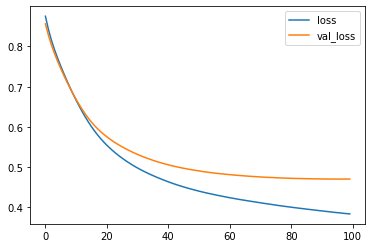

In [132]:
# Membuat DataFrame sequential metrics
sequential_metric_imp = pd.DataFrame(history_train_sqt_imp.history)
# Memplotkan. apakah hasilnya JustFit, UnderFit, atau OverFit
sequential_metric_imp[['loss','val_loss']].plot()

setelah di imporve model sequential lebih terlihat menurut kadar overfitnya. yang artinya model lebih bagus dalam memprediksi sebuah churn. karena jarak antara val_loss dan loss tidak sejauh model sequential sebelum dilakukan improve.

In [137]:
# Functional API Improvement
data_in_imp = Input(shape=(25,))
hidden_1_imp = Dense(20, activation='relu',  kernel_regularizer= tf.keras.regularizers.L2())(data_in_imp)
hidden_2_imp = Dense(15)(hidden_1_imp)
data_out_imp = Dense(1, activation= 'sigmoid')(hidden_2_imp)

model_fun_imp = Model(inputs=data_in_imp, outputs=data_out_imp)

# Compile
model_fun_imp.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics='accuracy')

# Train
history_train_fun_imp = model_fun_imp.fit(train_dataset, epochs=100, validation_data=(val_dataset))

Epoch 1/100
6/6 [==============================] - 1s 25ms/step - loss: 0.8004 - accuracy: 0.7587 - val_loss: 0.7720 - val_accuracy: 0.7664
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.7581 - accuracy: 0.7685 - val_loss: 0.7430 - val_accuracy: 0.7673
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: 0.7341 - accuracy: 0.7587 - val_loss: 0.7246 - val_accuracy: 0.7604
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.7164 - accuracy: 0.7516 - val_loss: 0.7087 - val_accuracy: 0.7653
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6994 - accuracy: 0.7605 - val_loss: 0.6936 - val_accuracy: 0.7720
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 0.6832 - accuracy: 0.7711 - val_loss: 0.6800 - val_accuracy: 0.7773
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6685 - accuracy: 0.7792 - val_loss: 0.6678 - val_accuracy: 0.7780
Epoch 8/100
6/6 [=====

<AxesSubplot:>

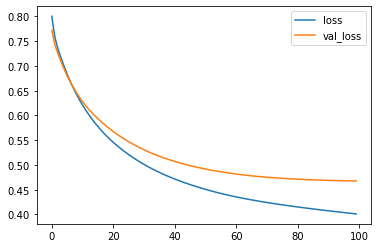

In [138]:
# Membuat DataFrame functional metrics
functional_metric_imp = pd.DataFrame(history_train_fun_imp.history)
# Memplotkan. apakah hasilnya JustFit, UnderFit, atau OverFit
functional_metric_imp[['loss','val_loss']].plot()

setelah di imporve model sequential lebih terlihat menurut kadar overfitnya. yang artinya model lebih bagus dalam memprediksi sebuah churn. karena jarak antara val_loss dan loss tidak sejauh model functional sebelum dilakukan improve.

In [156]:
# Sequential Evaluation Imporovement
y_pred_sqt_imp = model_sqt_imp.predict(X_test)

# Threshold
y_pred_sqt_imp = np.where(y_pred_sqt_imp >= 0.5, 1, 0)

print('Sequential API Classification Report Improvement')
print(classification_report(y_pred_sqt_imp,y_test))

print('-------------------------------------------------------------------------------------------')

# Functional Evaluation
y_pred_fun_imp = model_fun_imp.predict(X_test)

# Threshold
y_pred_fun_imp = np.where(y_pred_fun_imp >= 0.5, 1, 0)

print('Functional API Classification Report Imporovement')
print(classification_report(y_test,y_pred_fun_imp))

44/44 [==============================] - 0s 1ms/step
Sequential API Classification Report Improvement
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1069
           1       0.58      0.68      0.62       336

    accuracy                           0.80      1405
   macro avg       0.73      0.76      0.75      1405
weighted avg       0.82      0.80      0.81      1405

-------------------------------------------------------------------------------------------
44/44 [==============================] - 0s 616us/step
Functional API Classification Report Imporovement
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1009
           1       0.70      0.57      0.63       396

    accuracy                           0.81      1405
   macro avg       0.77      0.74      0.75      1405
weighted avg       0.80      0.81      0.80      1405



berdasarkan hasil classification report dari kedua model yang sudah di improve, menghasilkan;
- sequential model, mendapatkan nilai precision sebesar 89%. yang artinya ada 89% dari data yang di klasifikasikan positif tidak churn dan dibandingkan dengan nilai recall sebesar 84%.
- sedangkan funcitonal model, mendapatkan nilai precision sebesar 84% yang artinya ada 84% dari data yang di klasifikasikan positif tidak churn dan dibandingkan dengan nilai recall 91%.
    - setelah di improve modelnya menghasilkan data tidak jauh berbeda dari sebelumnya. seperti yang sudah saya katakan pada model sebelum di improve, model yang memilliki nilai precision lebih bagus dalam hal memprediksi dalam kasus churn ini. jika memiiki nilai percision yang tinggi artinya dapat meminimalisirkan false positif yang artinya kita dapat memprediksi dengan benar apakah customer tersebut akan churn atau tidak.

# Model Saving

In [163]:
# save model sequential
model_sqt.save("sequential_churn")

# save model functional
model_fun.save("Functional_churn")

INFO:tensorflow:Assets written to: sequential_churn\assets
INFO:tensorflow:Assets written to: Functional_churn\assets


In [164]:
# save model sequential improvement
model_sqt_imp.save("sequential_churn_improve")

# save model functional improvement
model_fun_imp.save("functional_churn_improve")

INFO:tensorflow:Assets written to: sequential_churn_improve\assets
INFO:tensorflow:Assets written to: functional_churn_improve\assets


# Model Inference

menurut saya, data inference akan lebih baik jika dilakukan prediksi dengan menggunakan Sequential API Model. karena menurut saya dibandingkan dengan functional model, sequential model lebih baik memprediksi churn nya.

In [37]:
df_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,1,0.805556,1,1,0,0,0,0,0,0,1,0.062189,0.170679,0,1,0,0,0,1,0,0,1,0,0
1,Female,1,1,0,0.430556,1,1,0,0,1,0,1,0,1,0.720896,0.325029,0,0,0,1,0,1,0,0,0,1,0
2,Female,0,0,0,0.833333,0,0,1,0,1,0,1,1,0,0.351741,0.371365,0,0,1,0,0,0,1,0,0,1,0
3,Female,0,1,0,0.986111,1,1,1,1,1,1,1,1,0,0.693532,0.732351,0,0,1,0,0,0,1,1,0,0,0
4,Female,0,0,0,0.958333,1,1,0,0,0,0,0,0,0,0.063184,0.191467,0,1,0,0,0,0,1,0,1,0,0
5,Female,0,0,0,0.833333,1,1,1,0,1,1,0,0,0,0.462687,0.463963,0,0,1,0,0,1,0,0,0,1,0
6,Female,0,1,1,0.166667,1,0,0,0,0,0,0,0,0,0.015423,0.024325,1,1,0,0,0,1,0,1,0,0,0
7,Female,1,0,0,0.486111,1,1,1,1,1,1,1,1,1,0.920896,0.440515,0,0,0,1,0,1,0,1,0,0,0
8,Female,0,1,0,0.722222,0,0,1,1,1,1,1,1,0,0.477612,0.382102,0,0,1,0,0,0,1,0,1,0,0
9,Female,0,1,1,0.180556,1,0,1,0,1,0,0,1,1,0.446766,0.092084,0,0,1,0,1,0,0,0,0,0,1


In [38]:
dfinf_X = df_inf.drop(['gender','Churn'], axis=1)
dfinf_y = df_inf['Churn']

In [39]:
# Membuat Pipeline Tensorflow

dfinf_dataset = tf.data.Dataset.from_tensor_slices((dfinf_X,dfinf_y)).batch(10)

In [40]:
# Sequential API
inf_sqt = Sequential()

inf_sqt.add(Dense(18, activation='relu', input_shape=(25,)))
inf_sqt.add(Dense(13))
inf_sqt.add(Dense(1, activation='sigmoid'))

# Compile
inf_sqt.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics='accuracy')

# Train
history_inf_sqt = inf_sqt.fit(dfinf_dataset, epochs=20, validation_data=(dfinf_dataset))

Epoch 1/20
2/2 [==============================] - 1s 113ms/step - loss: 0.8285 - accuracy: 0.2500 - val_loss: 0.7915 - val_accuracy: 0.3000
Epoch 2/20
2/2 [==============================] - 0s 16ms/step - loss: 0.7834 - accuracy: 0.3500 - val_loss: 0.7499 - val_accuracy: 0.4500
Epoch 3/20
2/2 [==============================] - 0s 16ms/step - loss: 0.7428 - accuracy: 0.4500 - val_loss: 0.7122 - val_accuracy: 0.4500
Epoch 4/20
2/2 [==============================] - 0s 22ms/step - loss: 0.7059 - accuracy: 0.5000 - val_loss: 0.6776 - val_accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 0s 24ms/step - loss: 0.6720 - accuracy: 0.5500 - val_loss: 0.6459 - val_accuracy: 0.6000
Epoch 6/20
2/2 [==============================] - 0s 17ms/step - loss: 0.6411 - accuracy: 0.6500 - val_loss: 0.6170 - val_accuracy: 0.7000
Epoch 7/20
2/2 [==============================] - 0s 19ms/step - loss: 0.6128 - accuracy: 0.7000 - val_loss: 0.5908 - val_accuracy: 0.8500
Epoch 8/20
2/2 [==========

In [41]:
# Membuat DataFrame model inference metrics
dfinf_metric = pd.DataFrame(history_inf_sqt.history)

<AxesSubplot:>

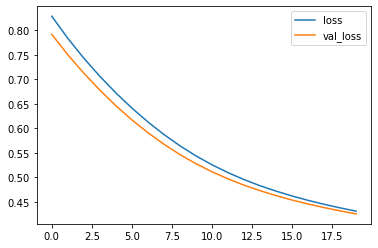

In [42]:
# Memplotkan. apakah hasilnya JustFit, UnderFit, atau OverFit
dfinf_metric[['loss','val_loss']].plot()

berdarrakan hasil plot menggunakan data inference, terlihat bahwa data tersebut dapat dikatakan JustFit atau sangat bagus dalam memprediksi. jarak antara val_loss dan loss semakin mengecil yang artinya data tersebut tertrain dengan sangat baik. 

In [157]:
# Data Inference Evaluation
y_pred_inf = inf_sqt.predict(dfinf_X)

# Threshold
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)

print('Functional API Classification Report')
print(classification_report(dfinf_y,y_pred_inf))

1/1 [==============================] - 0s 47ms/step
Functional API Classification Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       0.00      0.00      0.00         3

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20



c:\Users\annes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\annes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\annes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


dari seluruh data inference yang ada, terlihat bahwa dapat memprediksi 85% yang benar benar positif dan dari sekeluruhan data terprediksi 100% positive.

berarti kami berhasil dalam memprediksi secara 100%

In [159]:
# Menjadikan DataFrame model inference predict
dfinf_pred = pd.DataFrame(y_pred_inf, columns=['Prediciton'])

# Melihat data actual dan hasil prediksi
dfinf_final = pd.concat([(df_inf['Churn']), (dfinf_pred)], axis=1)
dfinf_final

,Churn,Prediciton
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,0
7,0,0
8,0,0
9,0,0


dilihat hasil data actual dan prediksi. terlihat bahwa dalam data inference semua customer berhasil terprediksi tidak churn atau tetap menggunakan Telco sebagai provider mereka. 

# Kesimpulan

Memprediksi churn. memprediksi apakah customer tersebut akan stay atau bertahan menggunakan Telco atau berhenti menggunakan Telco

berdasarkan hasil classification report dari kedua model yang belum di improve, menghasilkan;
- sequential model, mendapatkan nilai precision sebesar 89%. yang artinya ada 89% dari data yang di klasifikasikan positif tidak churn dan dibandingkan dengan nilai recall sebesar 85%.
- sedangkan funcitonal model, mendapatkan nilai precision sebesar 84% yang artinya ada 84% dari data yang di klasifikasikan positif tidak churn dan dibandingkan dengan nilai recall 90%.
    - menurut saya, dalam hal churn ini lebih baik memprediksi menggunakan sequential model karena sequential model memilliki nilai precision lebih besar daripada functional model. dalam hal ini, lebih baik jika memiliki nilai precision yang tinggi. jika memiiki nilai percision yang tinggi artinya dapat meminimalisirkan false positif yang artinya kita dapat memprediksi dengan benar apakah customer tersebut akan churn atau tidak.

----

berdasarkan hasil classification report dari kedua model yang sudah di improve, menghasilkan;
- sequential model, mendapatkan nilai precision sebesar 89%. yang artinya ada 89% dari data yang di klasifikasikan positif tidak churn dan dibandingkan dengan nilai recall sebesar 84%.
- sedangkan funcitonal model, mendapatkan nilai precision sebesar 84% yang artinya ada 84% dari data yang di klasifikasikan positif tidak churn dan dibandingkan dengan nilai recall 91%.
    - setelah di improve modelnya menghasilkan data tidak jauh berbeda dari sebelumnya. seperti yang sudah saya katakan pada model sebelum di improve, model yang memilliki nilai precision lebih bagus dalam hal memprediksi dalam kasus churn ini. jika memiiki nilai percision yang tinggi artinya dapat meminimalisirkan false positif yang artinya kita dapat memprediksi dengan benar apakah customer tersebut akan churn atau tidak.

Menurut saya, data inference akan lebih baik jika dilakukan prediksi dengan menggunakan Sequential API Model. karena menurut saya dibandingkan dengan functional model, sequential model lebih baik memprediksi churn nya.
- dari seluruh data inference yang ada, terlihat bahwa dapat memprediksi 85% yang benar benar positif dan dari sekeluruhan data terprediksi 100% positive.
- berarti kami berhasil dalam memprediksi secara 100%